# Topic
Elon musk first tweeted about doge coin in 20th December of 2020. It is assumed that because of this tweet, the dogecoin prices went up by 20%. We will verify this impact using google causal impact.
<br>
[Link to the tweet](https://twitter.com/elonmusk/status/1340590280848908288)

In [154]:
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

## Setting the Dates

In [155]:
#Dates
training_start = "2019-12-19"
training_end = "2020-12-19"
treatment_start = "2020-12-20"
treatment_end = "2021-01-31"
end_stock = "2021-02-01"

## Downloading from Yahoo Finances

In [156]:
#Download VW stock
y = ["DOGE-USD"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1d")
y = y['Adj Close'].rename("y")
y.head(5)

[*********************100%***********************]  1 of 1 completed


Date
2019-12-19    0.002123
2019-12-20    0.002075
2019-12-21    0.002084
2019-12-22    0.002115
2019-12-23    0.002073
Name: y, dtype: float64

In [157]:
#Load more stock data
stocks = ["RDD-USD", "MONA-USD", "TIPS-USD", "DOGEC-USD", "LCC-USD",
           "GRLC-USD", "POT-USD"]

X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1d").loc[:, ('Adj Close')]
X.head()

[*********************100%***********************]  7 of 7 completed


,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,
2019-12-19,0.010818,0.000503,0.007144,0.769842,0.005842,0.000650,1.000000e-06
2019-12-20,0.011914,0.000505,0.007004,0.787640,0.005849,0.000651,1.000000e-06
2019-12-21,0.013660,0.000647,0.006968,0.803981,0.005248,0.000578,1.000000e-06
2019-12-22,0.014941,0.000676,0.006905,0.835598,0.004956,0.000602,1.000000e-06
2019-12-23,0.011691,0.000662,0.006397,0.811020,0.005220,0.000597,1.000000e-06


In [158]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2019-12-19 to 2021-01-31
Freq: D
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DOGEC-USD  410 non-null    float64
 1   GRLC-USD   410 non-null    float64
 2   LCC-USD    410 non-null    float64
 3   MONA-USD   410 non-null    float64
 4   POT-USD    407 non-null    float64
 5   RDD-USD    410 non-null    float64
 6   TIPS-USD   410 non-null    float64
dtypes: float64(7)
memory usage: 25.6 KB


In [159]:
X.describe()

,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
count,410.000000,410.000000,410.000000,410.000000,407.000000,410.000000,4.100000e+02
mean,0.012041,0.001548,0.004324,1.469262,0.008287,0.001081,1.078049e-06
std,0.007028,0.001315,0.001774,0.325609,0.002874,0.000418,2.775303e-07
min,0.002566,0.000088,0.001824,0.753080,0.004027,0.000470,1.000000e-06
25%,0.007706,0.000460,0.003341,1.245884,0.006284,0.000852,1.000000e-06
50%,0.009626,0.001315,0.003914,1.406287,0.007882,0.001038,1.000000e-06
75%,0.014875,0.002404,0.005119,1.710849,0.008800,0.001254,1.000000e-06
max,0.038360,0.008687,0.012383,2.693467,0.022703,0.005293,3.000000e-06


In [160]:
X.index = X.index.tz_localize(None)
X.index

DatetimeIndex(['2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28',
               ...
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=410, freq='D')

In [161]:
y.index = y.index.tz_localize(None)

## Making the df

In [162]:
df = pd.concat([y,X], axis = 1).dropna()
df.head()

,y,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,,
2019-12-19,0.002123,0.010818,0.000503,0.007144,0.769842,0.005842,0.000650,1.000000e-06
2019-12-20,0.002075,0.011914,0.000505,0.007004,0.787640,0.005849,0.000651,1.000000e-06
2019-12-21,0.002084,0.013660,0.000647,0.006968,0.803981,0.005248,0.000578,1.000000e-06
2019-12-22,0.002115,0.014941,0.000676,0.006905,0.835598,0.004956,0.000602,1.000000e-06
2019-12-23,0.002073,0.011691,0.000662,0.006397,0.811020,0.005220,0.000597,1.000000e-06


In [163]:
df_training = df.loc[(df.index <= training_end), :]
df_training

,y,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,,
2019-12-19,0.002123,0.010818,0.000503,0.007144,0.769842,0.005842,0.000650,1.000000e-06
2019-12-20,0.002075,0.011914,0.000505,0.007004,0.787640,0.005849,0.000651,1.000000e-06
2019-12-21,0.002084,0.013660,0.000647,0.006968,0.803981,0.005248,0.000578,1.000000e-06
2019-12-22,0.002115,0.014941,0.000676,0.006905,0.835598,0.004956,0.000602,1.000000e-06
2019-12-23,0.002073,0.011691,0.000662,0.006397,0.811020,0.005220,0.000597,1.000000e-06
...,...,...,...,...,...,...,...,...
2020-12-15,0.003206,0.007582,0.003276,0.002397,1.382280,0.006409,0.001039,1.000000e-06
2020-12-16,0.003416,0.008105,0.003629,0.002545,1.442342,0.007245,0.001109,1.000000e-06
2020-12-17,0.003730,0.009341,0.005478,0.002739,1.491895,0.008670,0.001141,1.000000e-06


# Checking Quality of Data

## Checking Stationarity

In [164]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)[1]

#how to read - ifelse
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is not stationary


We have to make this data stationary.

### Differencing

In [165]:
differencing = df_training.pct_change().dropna()
differencing.head(2)

,y,DOGEC-USD,GRLC-USD,LCC-USD,MONA-USD,POT-USD,RDD-USD,TIPS-USD
Date,,,,,,,,
2019-12-20,-0.022610,0.101313,0.003976,-0.019597,0.023119,0.001198,0.001538,0.0
2019-12-21,0.004337,0.146550,0.281188,-0.005140,0.020747,-0.102753,-0.112135,0.0


In [166]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = differencing.y)[1]

#how to read - ifelse
if test < 0.05:
  print("The Time Series is stationary")
else:
  print("The Time Series is not stationary")

The Time Series is stationary


## Checking correlations

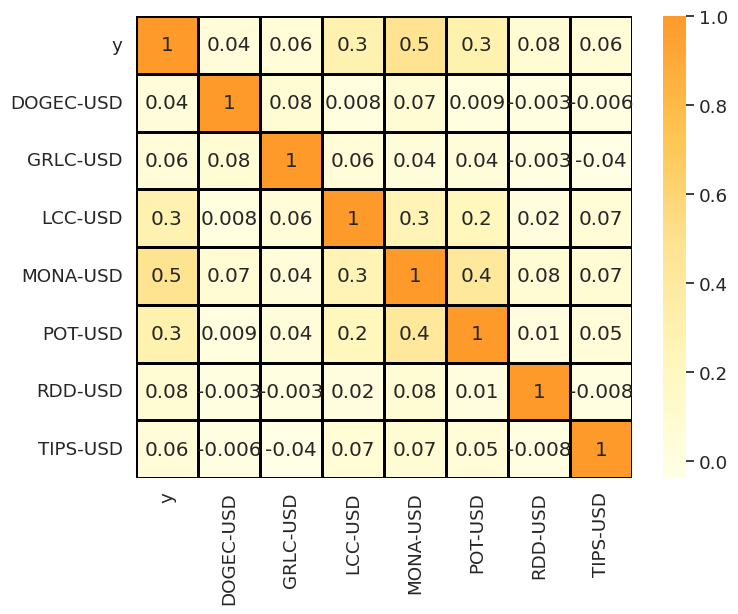

In [167]:
#Correlation Matrix
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            cmap = 'YlOrBr',
            center =  True,
            linewidth = 1,
            linecolor = 'black')
plt.show()

### Dropping variables with low correlations with the label

In [168]:
df_final = df.drop(columns = ['TIPS-USD', 'RDD-USD', 'GRLC-USD', 'DOGEC-USD'])
df_final

,y,LCC-USD,MONA-USD,POT-USD
Date,,,,
2019-12-19,0.002123,0.007144,0.769842,0.005842
2019-12-20,0.002075,0.007004,0.787640,0.005849
2019-12-21,0.002084,0.006968,0.803981,0.005248
2019-12-22,0.002115,0.006905,0.835598,0.004956
2019-12-23,0.002073,0.006397,0.811020,0.005220
...,...,...,...,...
2021-01-27,0.007482,0.004563,1.510407,0.011690
2021-01-28,0.034084,0.005030,1.568909,0.013020
2021-01-29,0.047162,0.005315,1.615260,0.016509


# Causal Impact

In [170]:
#Pre and post period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]
pre_period, post_period

(['2019-12-19', '2020-12-19'], ['2020-12-20', '2021-01-31'])

## Training the model

In [172]:
df_final

,y,LCC-USD,MONA-USD,POT-USD
Date,,,,
2019-12-19,0.002123,0.007144,0.769842,0.005842
2019-12-20,0.002075,0.007004,0.787640,0.005849
2019-12-21,0.002084,0.006968,0.803981,0.005248
2019-12-22,0.002115,0.006905,0.835598,0.004956
2019-12-23,0.002073,0.006397,0.811020,0.005220
...,...,...,...,...
2021-01-27,0.007482,0.004563,1.510407,0.011690
2021-01-28,0.034084,0.005030,1.568909,0.013020
2021-01-29,0.047162,0.005315,1.615260,0.016509


In [173]:
#Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

AttributeError: 'NoneType' object has no attribute 'iloc'

<Figure size 1500x1200 with 0 Axes>

## Summary Stats and Visualization

In [ ]:
impact.plot()

In [ ]:
print(impact.summary())

In [ ]:
#Summary report
print(impact.summary('report'))